# 결정트리와 랜덤 포레스트

In [2]:
from preamble import *

## 결정트리
- 장점 : 전처리에 민감하지 않음
- 단점 : 과대적합에 취약

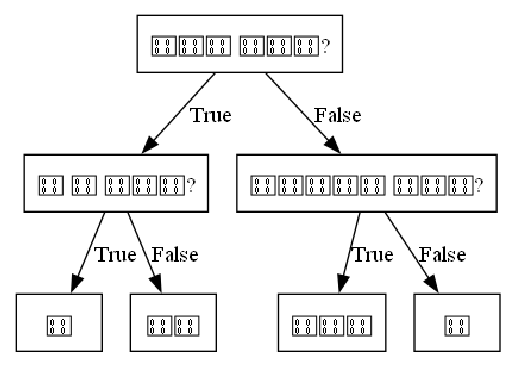

In [22]:
# 결정트리 예제
# TODO: 한국어 깨짐
mglearn.plots.plot_animal_tree()

### 일반적인 결정트리 학습

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train), tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


### 결정트리 시각화

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["악성","양성"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

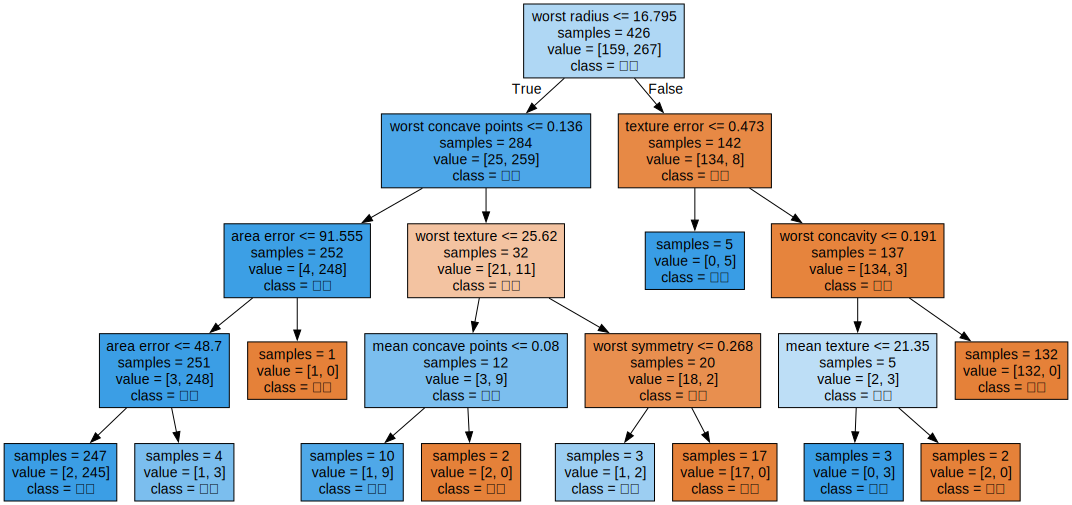

In [21]:
import graphviz
with open("tree.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 특성 중요도

In [23]:
def plot_feat_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(np.arange(n_feat), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feat)

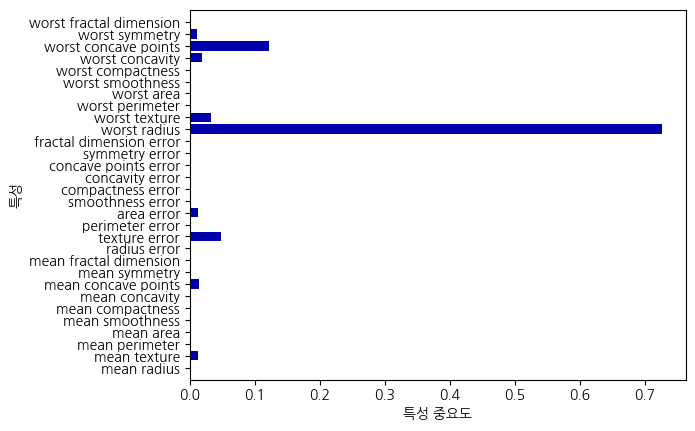

In [24]:
plot_feat_importances(tree)

In [25]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

## 랜덤 포레스트

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train), forest.score(X_test, y_test))

1.0 0.958041958041958


In [32]:
from sklearn.tree import export_graphviz

# 예측기 1개를 선택
# TODO: forest 전체값으로 변경
estimator = forest.estimators_[3]

export_graphviz(estimator, 
                out_file="forest.dot", 
                class_names=["악성","양성"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

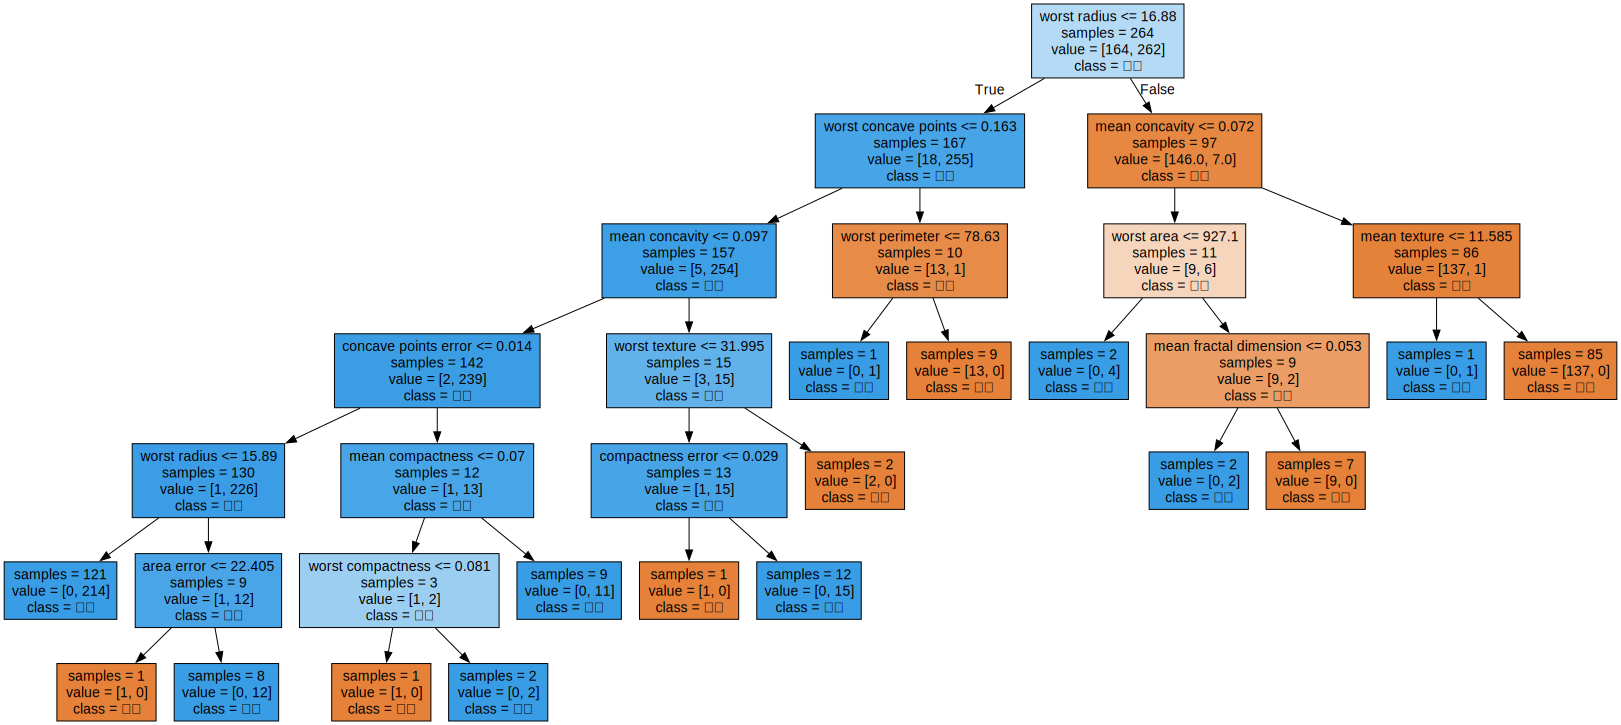

In [33]:
import graphviz
with open("forest.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

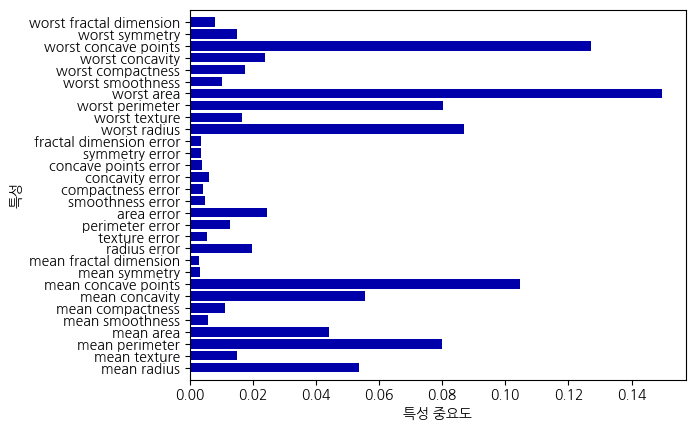

In [27]:
plot_feat_importances(forest)

## 예제

In [37]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  333 non-null    int64  
 1   date        333 non-null    float64
 2   price       333 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


### 데이터 시각화

In [52]:
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, '가격 ($/Mbyte)')

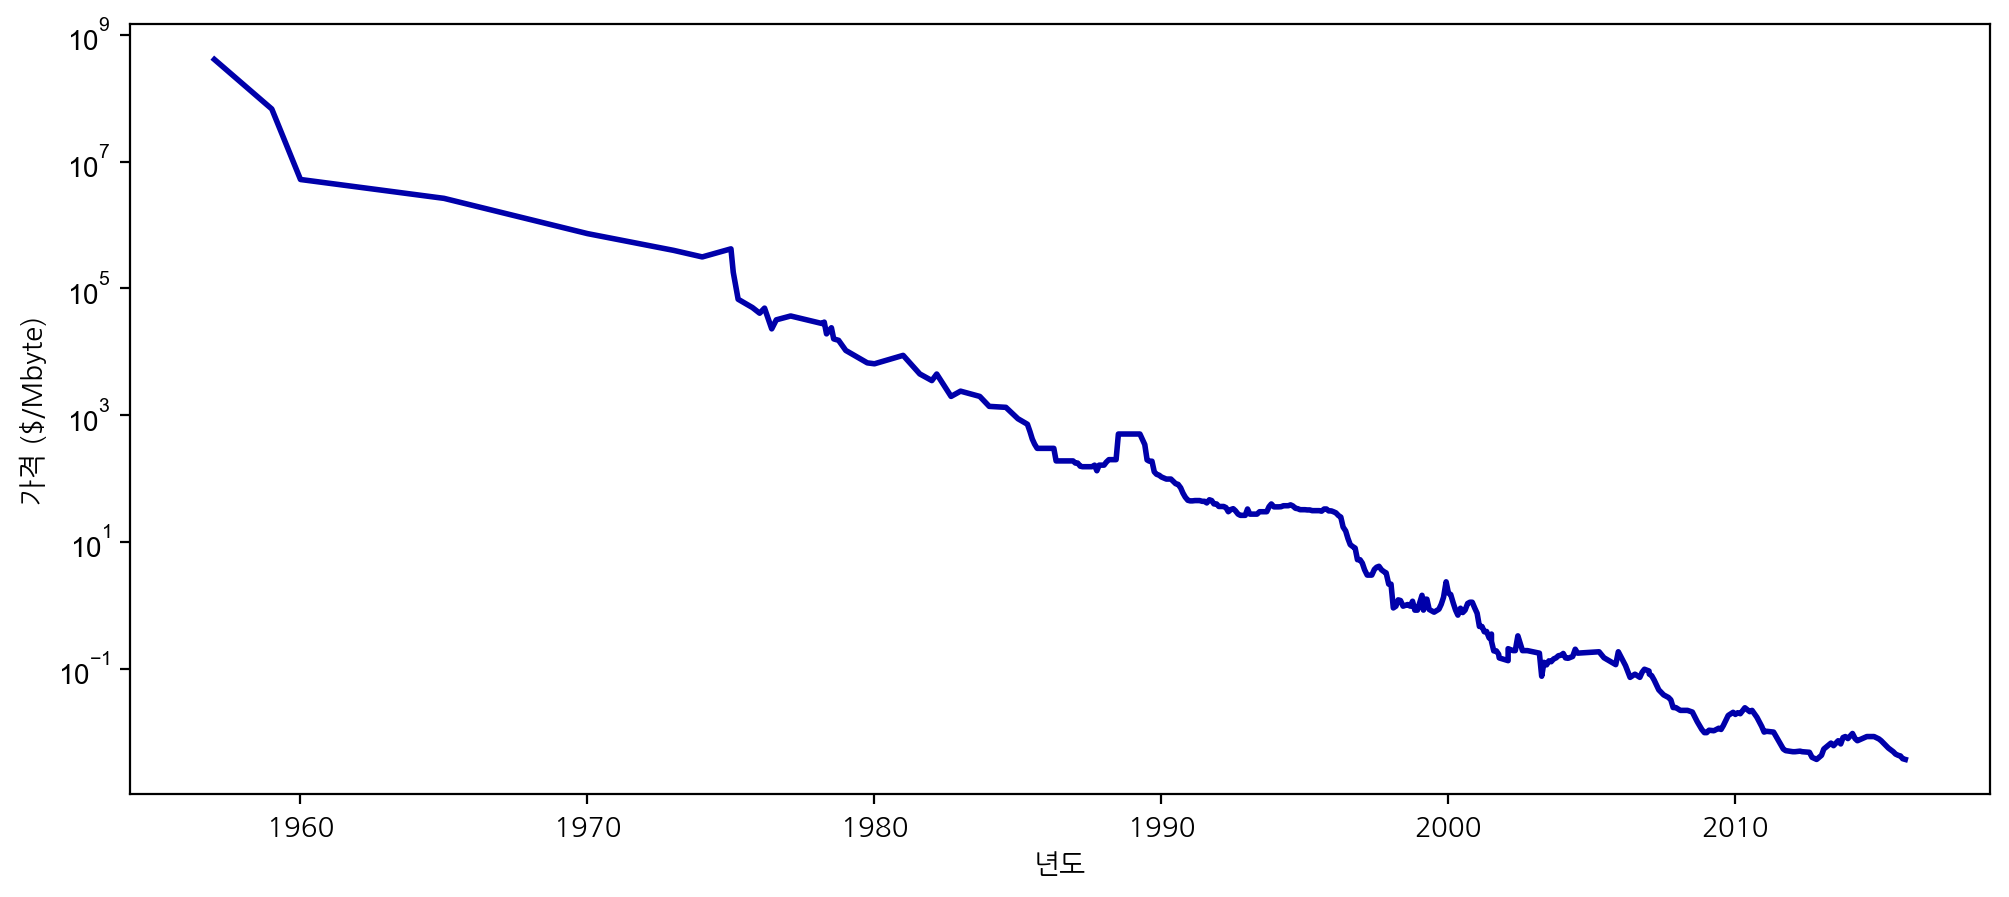

In [69]:
plt.figure(figsize=(12,5))
plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")

### 데이터 준비

In [55]:
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

### 학습

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train, y_train)

In [65]:
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_reg = reg.predict(X_all)
pred_forest = forest.predict(X_all)

In [66]:
price_tree = np.exp(pred_tree)
price_reg = np.exp(pred_reg)
price_forest = np.exp(pred_forest)

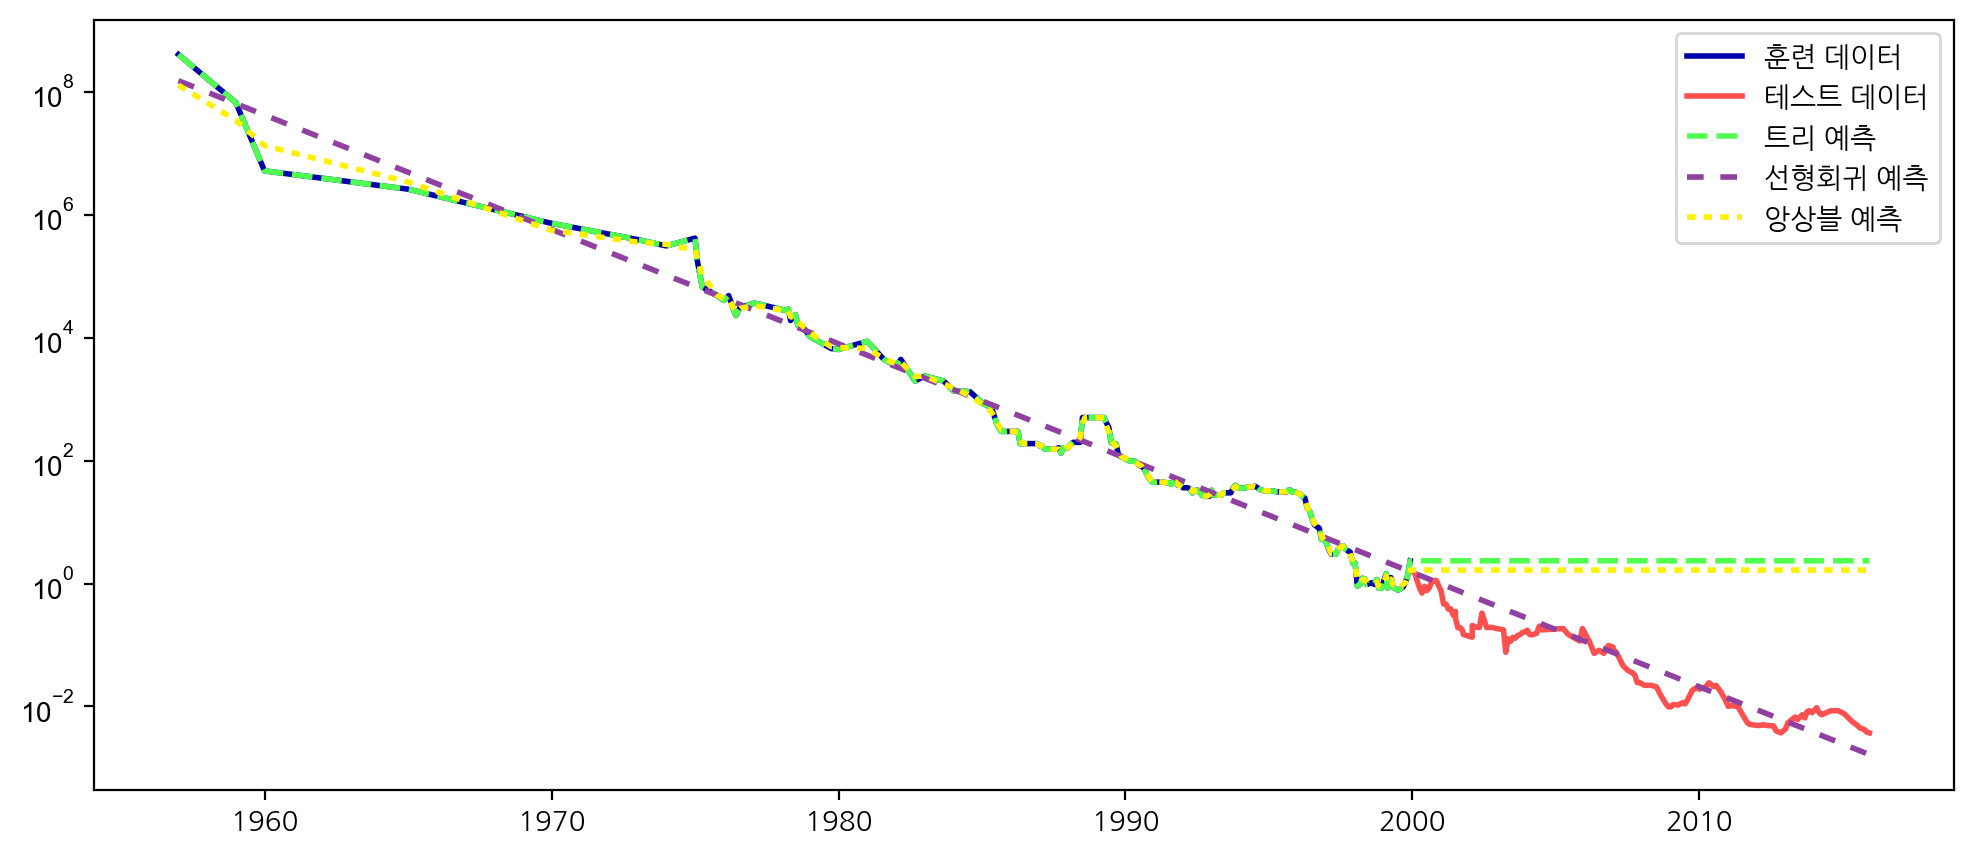

In [67]:
plt.figure(figsize=(12,5))
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_reg, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.legend()